# Topics in Quantitative Finance, Summer 2023 

## Lecture 3: The Black-Merton-Scholes model and beyond I

<br>
<br>

<center>
<font size=5, color=darkblue> Tai-Ho Wang (王 太和)</font>
</center>
<img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/MFE-Logo.jpg" align = "center" width=450>

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\cA}{\mathcal{A} }
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\Etof}[1]{\mathbb{E}_t\left[ #1 \right]}
\newcommand{\Sdof}[1]{\mathbb{Sd}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
\newcommand{\inn}[2]{\left\langle #1, #2 \right\rangle}
\newcommand{\bX}{\boldsymbol X}
\newcommand{\bm}{\boldsymbol m}
\newcommand{\bx}{\boldsymbol x}
\newcommand{\by}{\boldsymbol y}
\newcommand{\bmu}{\boldsymbol\mu}
\newcommand{\bxi}{\boldsymbol\xi}
$$



## Agenda

- Black-Merton-Scholes model
- Black-Merton-Scholes formula for call and put options
- Greeks
- Subtlety in self-financing
- Delta and delta-gamma hedges
- Dynamic hedging
- Deep hedging

## Black-Merton-Scholes

From the [Wikipage](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model):

- The Black–Scholes or Black–Scholes–Merton model is a mathematical model for the dynamics of a financial market containing derivative investment instruments. From the partial differential equation in the model, known as the Black–Scholes equation, one can deduce the Black–Scholes formula, which gives a theoretical estimate of the price of European-style options and shows that the option has a unique price regardless of the <font color=red>risk of the security</font> and its expected return (instead replacing the security's expected return with the risk-neutral rate). The formula led to a boom in options trading and provided mathematical legitimacy to the activities of the Chicago Board Options Exchange and other options markets around the world. It is widely used, although often with adjustments and corrections, by options market participants.

- The key idea behind the model is to hedge the option by buying and selling the underlying asset in just the right way and, as a consequence, to eliminate risk. This type of hedging is called "continuously revised delta hedging" and is the basis of more complicated hedging strategies such as those engaged in by investment banks and hedge funds. 

- The Black–Scholes formula has only one parameter that cannot be directly observed in the market: the average future volatility of the underlying asset, though it can be found from the price of other options. Since the option value (whether put or call) is increasing in this parameter, it can be inverted to produce a "volatility surface" (<font color=blue>implied volatility</font>) that is then used to calibrate other models (<font color=blue>(exotic) derivatives</font>), e.g. for OTC derivatives. 

## The Black-Scholes world

The Black–Scholes model assumes that the market consists of at least one risky asset, usually called the stock, and one riskless asset, usually called the money market, cash, or bond.

Assumptions on the assets:

- (riskless rate) The rate of return on the riskless asset is constant and thus called the risk-free interest rate.
- (Brownian motion) The instantaneous log return of stock price is a Brownian motion with drift; and we will assume its drift and volatility are constant (if they are time-varying, we can deduce a suitably modified Black–Scholes formula quite simply, as long as the volatility is not random). As a result, the stock price follows a geometric Brownian motion. 
- The stock does not pay dividend.

Assumptions on the market:

- There exists no arbitrage opportunity.
- It is possible to borrow and lend any amount, even fractional, of cash at the riskless rate.
- It is possible to buy and sell any amount, even fractional, of the stock, including short selling.
- Frictionless market: the transactions do not incur any fees or costs.


## Black-Scholes model

Assume the price of the underlying asset follows the stochastic differential equation

$$
\frac{dS_t}{S_t} = \mu dt + \sigma dW_t,
$$

where

- $\mu$: (constant) expected return 
- $\sigma$: (constant) volatility 
- $W_t$: standard Brownian motion

For each time $t$, $S_t$ is lognormally distributed. More precisely,

$$
S_t \sim S_0 \exp\left[\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma \sqrt t Z \right]
$$

where $Z$ is a standard normal random variable.

#### Note
$S_t$ has the closed form expression

$$
S_t = S_0 e^{\left(\mu - \frac{\sigma^2}2 \right) t+ \sigma W_t}
$$

and is also referred to as a *geometric Brownian motion*.

## Pricing under the Black-Scholes model

Assume the price of a call option $C$ is a (smooth enough) function of the calendar time $t$ and the underlying asset $S$. Consider the portfolio $\Pi$ consisting of selling a call option and holding $\Delta$ shares of $S$.

- The value of $\Pi$ at time $t$ is
$$
\Pi_t =  -C(t, S_t) + \Delta S_t
$$

- <font color=blue> Self-financing strategy </font>

$$
d \Pi_t =  -dC_t + \Delta dS_t
$$

- The change of call price is given by

\begin{eqnarray*}
dC(t,S_t) &=& C_t dt + C_S dS_t + \frac12 C_{SS} (dS_t)^2  \\
&=& C_S \sigma S dW_t + \left( C_t + \frac12 \sigma^2 S^2 C_{SS} + \mu S C_S \right) dt
\end{eqnarray*}

- Hence the infinitesimal change of $\Pi$ at time $t$ is

\begin{eqnarray*}
d \Pi_t &=& -dC_t + \Delta dS_t   \\
&=& -\left[ C_t + \frac12 \sigma^2 S^2 C_{SS} + \mu S (C_S - \Delta) \right] dt - \sigma S (C_S - \Delta) dW_t
\end{eqnarray*}

#### Note
$(dS_t)^2 = \sigma^2 S_t^2 dt$

- Let $\Delta = C_S$, i.e., hold this amount $C_S(t,S_t)$ of underlying assets in the portfolio $\Pi$. Then the infinitesimal change of $\Pi$ becomes

$$
\displaystyle d\Pi_t = -\left( C_t + \frac12 \sigma^2 S^2 C_{SS} \right) dt
$$

- On the other hand, with this choice of $\Delta$, $\Pi$ is riskless (non-random) hence must be like cash in bank account (Arbitrage Pricing Theory), i.e.,

$$
d\Pi_t = r \Pi_t dt = r(-C + \Delta S)dt = r(-C + C_S S) dt,
$$
   
where $r$ is the interest rate.


## Black-Scholes PDE

We conclude that the price $C$ of a call option satisfies

\begin{eqnarray*}
   \frac{\p C}{\p t} + \frac{\sigma^2}{2}S^2\frac{\p C^2}{\p S^2} + rS\frac{\p C}{\p S} - rC = 0,
   \mbox{ for } 0 < S < \infty, \quad 0 \leq t < T
\end{eqnarray*}

with terminal condition

$$
C(T,S) = (S - K)^+
$$

and boundary conditions

\begin{eqnarray*}
   && C(t,0) = 0  \\
   && C(t,S) \sim S - K e^{-r(T-t)} \mbox{ as } S \to\infty \\
   && \mbox{ or more specificly} \lim_{S\to\infty} \frac{C(t, S)}S = 1
\end{eqnarray*}

#### Note
The Black-Scholes pricing PDE does not depend on the drift $\mu$.

## Solving Black-Scholes PDE

$$
\frac{\p C}{\p t} + \frac{\sigma^2}{2}S^2\frac{\p C^2}{\p S^2} + rS\frac{\p C}{\p S} - rC = 0
$$

- $\tau = T - t$

$$
\frac{\p C}{\p \tau} = \frac{\sigma^2}{2}S^2\frac{\p C^2}{\p S^2} + rS\frac{\p C}{\p S} - rC
$$

- $ \xi = \ln S$

$$
\frac{\p C}{\p \tau} = \frac{\sigma^2}{2}\frac{\p C^2}{\p \xi^2} + \left( r -\frac{\sigma^2}{2} \right) \frac{\p C}{\p \xi} - rC
$$

- $c(\xi,\tau) = e^{r\tau}C(\xi,\tau)$

$$
\frac{\p c}{\p \tau} = \frac{\sigma^2}{2}\frac{\p c^2}{\p \xi^2} + \left( r -\frac{\sigma^2}{2} \right) \frac{\p c}{\p \xi}
$$

- $x = \xi + \left( r - \frac{\sigma^2}{2} \right) \tau $

$$
\frac{\p c}{\p \tau} = \frac{\sigma^2}{2} \frac{\p^2 c}{\p x^2}
$$

In total, we have done the transformation

\begin{eqnarray*}
&& \tau = T - t  \\
&& x = \ln S + \left( r - \frac{\sigma^2}{2} \right) (T - t)  \\
&& c = e^{r(T-t)}C
\end{eqnarray*}

which transforms Black-Scholes equation into heat equation.

## The Black-Scholes formula 

For call

$$
C = S e^{-d\tau} N(d_1) - K e^{-r\tau} N(d_2)
$$

where $\tau$ is time to expiry, $N(\cdot)$ denotes the cdf for standard normal, and 

$$
d_1 = \frac{\log\left(\frac{Se^{-d\tau}}{Ke^{-r\tau}}\right)}{\sigma\sqrt\tau}+ \frac{\sigma\sqrt\tau}2, \qquad d_2 = d_1 - \sigma \sqrt\tau
$$

For put

$$
P = K e^{-r\tau} N(-d_2) - S e^{-d\tau} N(-d_1).
$$

$\tau = T - t$

### Note
- Put-call parity

    $$
    C - P = S e^{-d\tau} - K e^{-r\tau}.
    $$
    
- Financial meaning of $N(d_1)$ and $N(d_2)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import exp, log, sqrt
from scipy.stats import norm

In [2]:
norm.rvs(size=10) # generate samples from standard normal 
norm.cdf # cdf of standard normal
norm.pdf # pdf for standard normal
norm.ppf # quantile funciton

<bound method rv_continuous.ppf of <scipy.stats._continuous_distns.norm_gen object at 0x7f9d19d2a490>>

In [3]:
print(norm.cdf(0)) # This is N(0) in our notation
norm.cdf((-9, -2, -1, 0, 1, 2, 3, 4, 9))

0.5


array([1.12858841e-19, 2.27501319e-02, 1.58655254e-01, 5.00000000e-01,
       8.41344746e-01, 9.77249868e-01, 9.98650102e-01, 9.99968329e-01,
       1.00000000e+00])

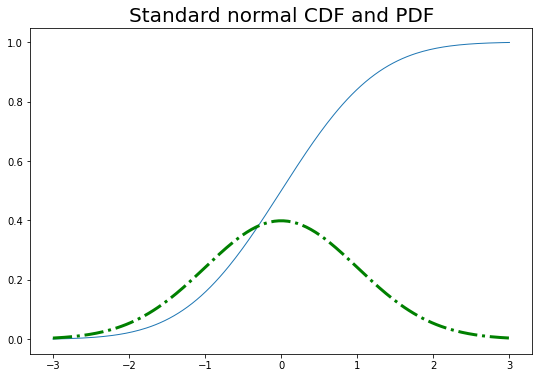

In [3]:
# plot cdf and pdf for standard normal
x = np.linspace(-3, 3, 201)
y = norm.cdf(x)
plt.figure(figsize=(9, 6))
plt.title('Standard normal CDF and PDF', fontsize=20)
plt.plot(x, y, lw=1)
y = norm.pdf(x)
plt.plot(x, y, color='green', ls='dashdot', lw=3);

In [6]:
# Black-Scholes formulas
# call
# t is tau in the formula above
def bs_call(s, K, sigma, t, r=0, d=0):
    d1 = (log(s/K) + (r - d)*t)/(sigma*sqrt(t)) + sigma*sqrt(t)/2
    d2 = d1 - sigma*sqrt(t)
    
    c = s*exp(-d*t)*norm.cdf(d1) - K*exp(-r*t)*norm.cdf(d2)
    delta = exp(-d*t)*norm.cdf(d1)
    gamma = exp(-d*t)*norm.pdf(d1)/s/sigma/sqrt(t)
    
    return {'c': c, 'delta': delta, 'gamma': gamma}

#put
def bs_put(s, K, sigma, t, r=0, d=0):
    d1 = (log(s/K) + (r - d)*t)/(sigma*sqrt(t)) + sigma*sqrt(t)/2
    d2 = d1 - sigma*sqrt(t)
    
    p = K*exp(-r*t)*norm.cdf(-d2) - s*exp(-d*t)*norm.cdf(-d1)
    delta = -exp(-d*t)*norm.cdf(-d1)
    gamma = exp(-d*t)*norm.pdf(d1)/s/sigma/sqrt(t)
    
    return {'p': p, 'delta': delta, 'gamma': gamma}

In [7]:
print(bs_call(K=100, s=100, sigma=0.3, t=1))
print(bs_call(K=100, s=100, t=1, sigma=.3, r=0.05))
print(bs_put(s=100, K=90, t=1, sigma=.3))

{'c': 11.923538474048499, 'delta': 0.5596176923702425, 'gamma': 0.013149311030262966}
{'c': 14.231254785985826, 'delta': 0.6242517279060125, 'gamma': 0.012647764437231514}
{'p': 7.012879901849708, 'delta': -0.30811458236626543, 'gamma': 0.011728453149086748}


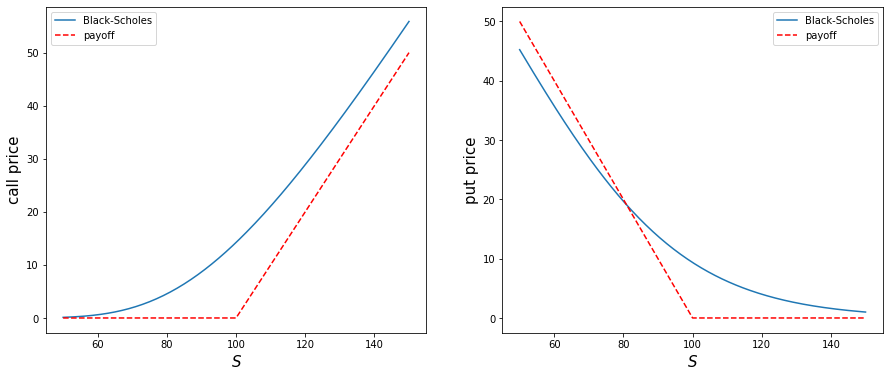

In [10]:
# option price as a function of the underlying
K, sig, T, r = 100, 0.3, 1, 0.05 #0.02

# payoffs of call and put
payoff_c = lambda s, k: (s - k)*(s > k)
payoff_p = lambda s, k: (k - s)*(k > s)

# some temp functions
tmpc = lambda x: bs_call(x, K, sig, T, r)['c']
tmpp = lambda x: bs_put(x, K, sig, T, r)['p']
tmp_payoff_c = lambda x: payoff_c(x, K)
tmp_payoff_p = lambda x: payoff_p(x, K)

# plot
x = np.linspace(50, 150, 201)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
y = tmpc(x)
plt.plot(x, y, label='Black-Scholes')
y = tmp_payoff_c(x)
plt.plot(x, y, color='red', ls='dashed', label='payoff')
plt.xlabel(r'$S$', fontsize=15)
plt.ylabel('call price', fontsize=15)
plt.legend()
plt.subplot(1, 2, 2)
y = tmpp(x)
plt.plot(x, y, label='Black-Scholes')
y = tmp_payoff_p(x)
plt.plot(x, y, color='red', ls='dashed', label='payoff')
plt.xlabel(r'$S$', fontsize=15)
plt.ylabel('put price', fontsize=15)
plt.legend();

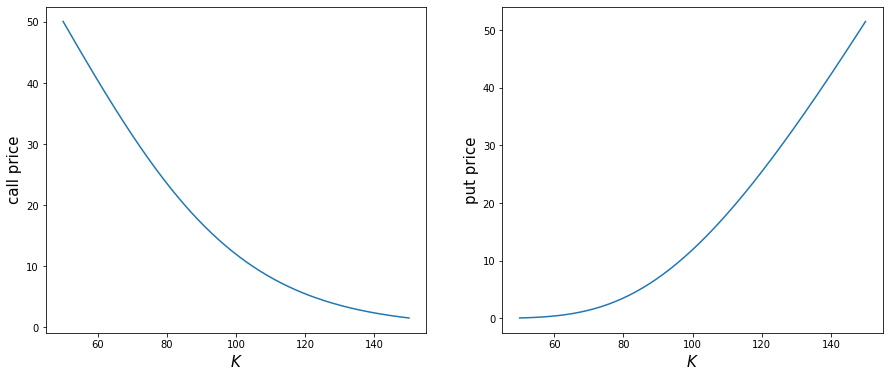

In [11]:
# option price as a function of strike
s, sig, T = 100, 0.3, 1

tmpc = lambda x: bs_call(s, x, sig, T)['c']
tmpp = lambda x: bs_put(s, x, sig, T)['p']

# plot
x = np.linspace(50, 150, 201)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
y = tmpc(x)
plt.plot(x, y, label='Black-Scholes')
plt.xlabel(r'$K$', fontsize=15)
plt.ylabel('call price', fontsize=15)
plt.subplot(1, 2, 2)
y = tmpp(x)
plt.plot(x, y, label='Black-Scholes')
plt.xlabel(r'$K$', fontsize=15)
plt.ylabel('put price', fontsize=15);

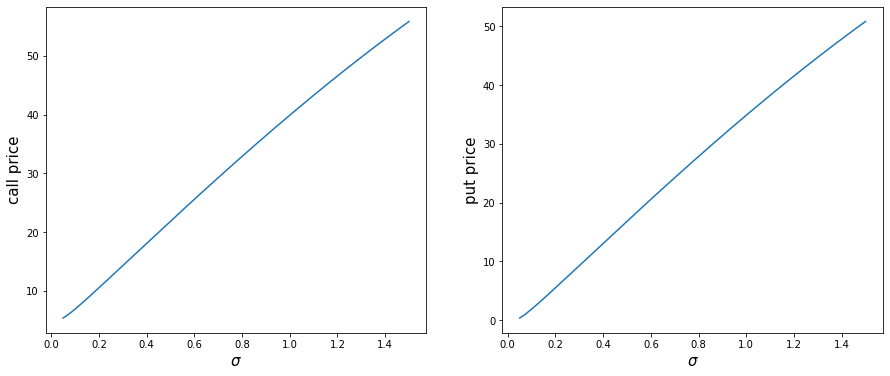

In [13]:
# option price as a function of volatility
s, K, T = 100, 95, 1

tmpc = lambda x: bs_call(s, K, x, T)['c']
tmpp = lambda x: bs_put(s, K, x, T)['p']

# plot
x = np.linspace(0.05, 1.5, 201)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
y = tmpc(x)
plt.plot(x, y, label='Black-Scholes')
plt.xlabel(r'$\sigma$', fontsize=15)
plt.ylabel('call price', fontsize=15)
plt.subplot(1, 2, 2)
y = tmpp(x)
plt.plot(x, y, label='Black-Scholes')
plt.xlabel(r'$\sigma$', fontsize=15)
plt.ylabel('put price', fontsize=15);

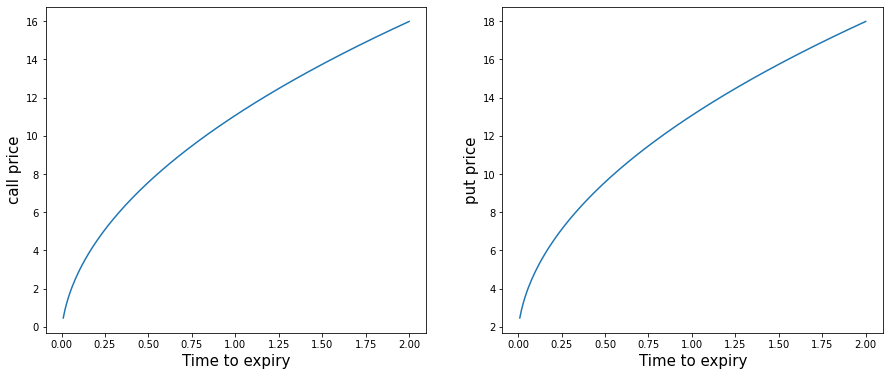

In [14]:
# option price as a function of time to expiry
s, K, sigma = 100, 102, 0.3

tmpc = lambda x: bs_call(s, K, sigma, x)['c']
tmpp = lambda x: bs_put(s, K, sigma, x)['p']

# plot
x = np.linspace(0.01, 2, 201)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
y = tmpc(x)
plt.plot(x, y, label='Black-Scholes')
plt.xlabel('Time to expiry', fontsize=15)
plt.ylabel('call price', fontsize=15)
plt.subplot(1, 2, 2)
y = tmpp(x)
plt.plot(x, y, label='Black-Scholes')
plt.xlabel('Time to expiry', fontsize=15)
plt.ylabel('put price', fontsize=15);

## Sensitivities of option prices in Black-Scholes model - the Greeks

Assume the dividend rate $d = 0$.

- For call:
    - $\Delta_C = \frac{\p C}{\p S} = N(d_1)$
    - Dual $\Delta_C^K = \frac{\p C}{\p K} = -e^{-rT} N(d_2)$ 
    - $\Gamma = \frac{\p^2 C}{\p S^2} = \frac{n(d_1)}{S\sigma\sqrt T}$
    - $\Theta_C = \frac{\p C}{\p T} = \frac{S \sigma}{2\sqrt T} n(d_1) + r K e^{-rT} N(d_2)$
    - $\nu \, (\mbox{vega}) = \frac{\p C}{\p \sigma} = S \sqrt T \, n(d_1) $
    - $\rho_C = \frac{\p C}{\p r} = K T e^{-rT} N(d_2)$

- For put:
    - $\Delta_P = \frac{\p P}{\p S} = \Delta_C - 1 = -N(-d_1)$
    - Dual $\Delta_P^K = \frac{\p P}{\p K} = \Delta_C^K + e^{-r T} = e^{-rT} N(-d_2)$ 
    - $\Gamma = \frac{\p^2 P}{\p S^2} = \frac{\p^2 C}{\p S^2}$
    - $\Theta_P = \frac{\p P}{\p T} = \Theta_C - r e^{-rT} K = \frac{S \sigma}{2\sqrt T} n(d_1) - r K e^{-rT} N(-d_2)$
    - $\nu \, (\mbox{vega}) = \frac{\p P}{\p \sigma} = \frac{\p C}{\p \sigma} = S \sqrt T n(d_1)$
    - $\rho_P = \frac{\p P}{\p r} = \rho_C - T e^{-rT} K = -K T e^{-rT} N(-d_2)$
    
#### Note
- $n(x) = N'(x)$ is the pdf for standard normal.
- $\Theta_C > 0$, whereas $\Theta_P$ may be negative if $r > 0$.

## Subtlety in self-financing

Assume that all the tradings are done at the mid price $S_t$, i.e., no bid-ask spread and transaction cost. 

In a discrete time setting, consider a portfolo consisting of holding $H_t$ shares of the underlying and $K_t$ dollars in the money/cash account at time $t$, interest and dividend are assumed zero for simplicity. 

The monetary value $V_t$ of the porffolio, *marked to market value at the mid price*, is thus given by $V_t = H_tS_t + K_t$ (before the price of the underlying changes from $S_t$ to $S_{t+1}$). At this point, the investor may decide to change his portfolio before he observes the price change of the underlying from $S_t$ to $S_{t+1}$ or after the price change.  

- *Before price change*. In this case, the self-financing condition reads 
$$
V_t = H_t S_t + K_t = H_{t+1} S_t + K_{t+1},
$$
where apparently $K_{t+1} = K_t + (H_t - H_{t+1})$<font color=blue>$S_t$</font>. In other words, the investor simply moves his money from stock to money account (or the other way around) without pouring/withdrawing extra money/shares into/out of the portfolio. The value of the porfolio (after price change) at time $t+1$ is given by $V_{t+1} = H_{t+1}S_{t+1} + K_{t+1}$. Hence, 
\begin{eqnarray*}
\Delta V_{t+1} &=& V_{t+1} - V_t \\
&=& H_{t+1}S_{t+1} + K_{t+1} - (H_t S_t + K_t) \\
&=& H_{t+1}S_{t+1} + K_{t+1} - (H_{t+1} S_t + K_{t+1}) \\
&=& H_{t+1} \Delta S_{t+1}.
\end{eqnarray*}
If we write $H_{t+1} = H_t + \Delta H_{t+1}$, then 

$$
\Delta V_{t+1} = H_t \Delta S_{t+1} + \Delta H_{t+1} \Delta S_{t+1}
$$

- *After price change*. In this case, the self-financing condition becomes 
$$
V_{t+1} = H_t S_{t+1} + K_t = H_{t+1} S_{t+1} + K_{t+1},
$$
where $K_{t+1} = K_t + (H_t - H_{t+1})$<font color=blue>$S_{t+1}$</font>. Hence, 
\begin{eqnarray*}
\Delta V_{t+1} &=& V_{t+1} - V_t \\
&=& H_{t+1}S_{t+1} + K_{t+1} - (H_t S_t + K_t) \\
&=& H_{t+1}S_{t+1} + K_t + (H_t - H_{t+1})S_{t+1} - (H_t S_t + K_t) \\
&=& H_t \Delta S_{t+1}.
\end{eqnarray*}

The subtlety results from the investor's decision to rebalance his position before or after he observes the price change. Moreover, the discrepancy between the two increments of portfolio values is exactly the covariation between the holdings $H_t$ and the price $S_t$ of the underlying. In the continuous time limit, the discrepancy becomes insignificent should the covariation vanishes in the continuous time limit. In a recent paper by Carmona and Webster, the authors argued that, in the high frequency trading regime, empirically this covariation is statistically significant. As a result, the process of holdings $H_t$ cannot be of finite variation, counterintuitive to common knowledge.

## Self-financing with traded price

In reality, trading incurs transaction cost which consist of bid-ask spread, fees, and taxes. The self-financing conditions with transaction cost becomes 

- *Before price change*. 
$$
V_t = H_t S_t + K_t = H_{t+1} S_t + K_{t+1} ,
$$
where $K_{t+1} = K_t + (H_t - H_{t+1})S_t - c_t$ and $c_t > 0$ denotes the transaction cost at time $t$. Hence, the increment of $V$ at time $t+1$ 
\begin{eqnarray*}
\Delta V_{t+1} &=& V_{t+1} - V_t \\
&=& H_{t+1}S_{t+1} + K_t + (H_t - H_{t+1})S_t - c_t - (H_t S_t + K_t) \\
&=& H_{t+1} \Delta S_{t+1} - c_t \\
&=& H_t \Delta S_{t+1} + \Delta H_{t+1} \Delta S_{t+1} - c_t.
\end{eqnarray*}

- *After price change*. By the same token, in this case one can show that 
\begin{eqnarray*}
\Delta V_{t+1} = H_t \Delta S_{t+1} - c_{t+1},
\end{eqnarray*} 
where the transaction cost $c_{t+1}$ is incurred at time $t+1$.

## Delta hedging

The portfolio used in deriving the Black-Scholes PDE is called *delta-hedging*.

#### Note
Rebalancing of hedging porfolio is done *after* the price change.  

### An example on delta hedge

In [11]:
r, sigma = 0, 0.3 
s0, K = 10, 11
dt = 1/252 # one day 
t = 1/4 # a quarter of year, 3 month

# unpack a dict by using the .values method for dict object
c, delta, _ = bs_call(s0, K, sigma, t, r).values()
print(f'call price = {c}, delta = {delta}') 
bs_call(s0, K, sigma, t, r)

call price = 0.25002448066930727, delta = 0.28760290709660397


{'c': 0.25002448066930727,
 'delta': 0.28760290709660397,
 'gamma': 0.2273127644037836}

In [12]:
print(bs_call(s0, K, sigma, t, r))
print(bs_call(s0, K, sigma, t, r).values())

{'c': 0.25002448066930727, 'delta': 0.28760290709660397, 'gamma': 0.2273127644037836}
dict_values([0.25002448066930727, 0.28760290709660397, 0.2273127644037836])


In [13]:
# a range of underlying prices one day later
s = s0 + np.linspace(-1, 1, 21)
print(s)

bs_call(s, K, sigma, t-dt, r)['c']
delta*s0 - c

[ 9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3
 10.4 10.5 10.6 10.7 10.8 10.9 11. ]


2.6260045902967324

In [14]:
pnl_naked = c - bs_call(s, K, sigma, t-dt, r)['c']
pnl_delta = delta*s - bs_call(s, K, sigma, t-dt, r)['c'] - (delta*s0 - c)
pd.DataFrame({'naked': pnl_naked, 'delta_hedged': pnl_delta})

,naked,delta_hedged
0,0.189399,-0.098204
1,0.178589,-0.080254
2,0.166344,-0.063738
3,0.152554,-0.048768
4,0.137110,-0.035452
5,0.119905,-0.023896
6,0.100837,-0.014204
7,0.079807,-0.006474
8,0.056725,-0.000796
9,0.031504,0.002744


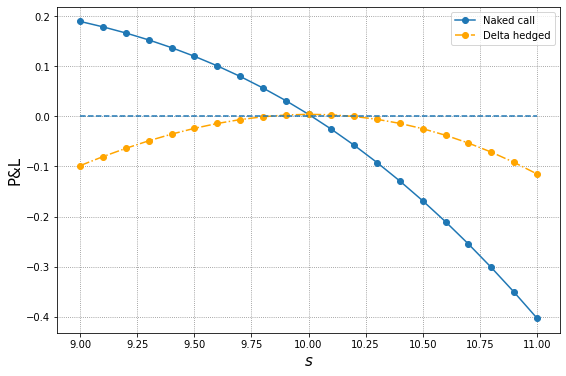

In [15]:
# plot
plt.figure(figsize=(9, 6))
plt.plot(s, pnl_naked, 'o-', label='Naked call')
plt.plot(s, pnl_delta, 'o-.', color='orange', label='Delta hedged')
plt.hlines(y=0, xmin=min(s), xmax=max(s), ls='dashed')
plt.grid(color='grey', ls='dotted')
plt.ylabel('P&L', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.legend();

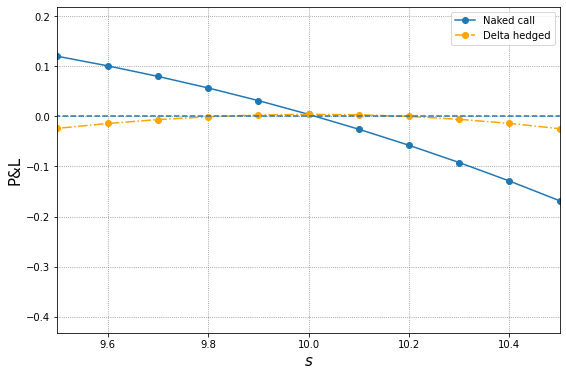

In [16]:
# zoom into the interval [9.5, 10.5]
plt.figure(figsize=(9, 6))
plt.plot(s, pnl_naked, 'o-', label='Naked call')
plt.plot(s, pnl_delta, 'o-.', color='orange', label='Delta hedged')
plt.hlines(y=0, xmin=min(s), xmax=max(s), ls='dashed')
plt.grid(color='grey', ls='dotted')
plt.ylabel('P&L', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.xlim(9.5, 10.5)
plt.legend();

## An exmaple on delta-gamma hedge

<font color=blue> Note </font>
The gammas of the underlying and forward are zero. To construct a delta-gamma hedge portfolio we need to add into the portfolio an instrument that has nonzero gamma, say, call or put options.

C 
C1

- $-\Gamma_C +  x \Gamma_{C1} = 0  \Longrightarrow x = \frac{\Gamma_C}{\Gamma_{C1}}$

-C + x C_1 + y S

- $-\Delta_C + x \Delta_{C1} + y = 0 \Longrightarrow y = \Delta_C - x \Delta_{C1}$

In [17]:
r, sigma, K, s0 = 0, 0.3, 11, 10
dt, t = 1/252, 1/4

# target call
c, delta, gamma = bs_call(s0, K, sigma, t, r).values()

# call for hedging
K_hg = 14
c_hg, delta_hg, gamma_hg = bs_call(s0, K_hg, sigma, t, r).values()

# 1 day later
s = s0 + np.linspace(-1, 1, 21)
cs = bs_call(s, K, sigma, t-dt, r)['c']
pnl_naked = c - cs
pnl_delta = delta*s - cs - (delta*s0 - c)
delta_dg = delta - gamma/gamma_hg*delta_hg
gamma_dg = gamma/gamma_hg
pnl_dg = delta_dg*s + gamma_dg*bs_call(s, K_hg, sigma, t-dt, r)['c'] - cs - (delta_dg*s0 + gamma_dg*c_hg  - c)

# pandas.DataFrame for presentation
df = pd.DataFrame(np.array([pnl_naked, pnl_delta, pnl_dg]).transpose())
df.columns = ['naked', 'delta hedged', 'delta-gamma hedged']
df

,naked,delta hedged,delta-gamma hedged
0,0.189399,-0.098204,-0.025266
1,0.178589,-0.080254,-0.018913
2,0.166344,-0.063738,-0.013499
3,0.152554,-0.048768,-0.009028
4,0.137110,-0.035452,-0.005487
5,0.119905,-0.023896,-0.002840
6,0.100837,-0.014204,-0.001027
7,0.079807,-0.006474,0.000038
8,0.056725,-0.000796,0.000471
9,0.031504,0.002744,0.000423


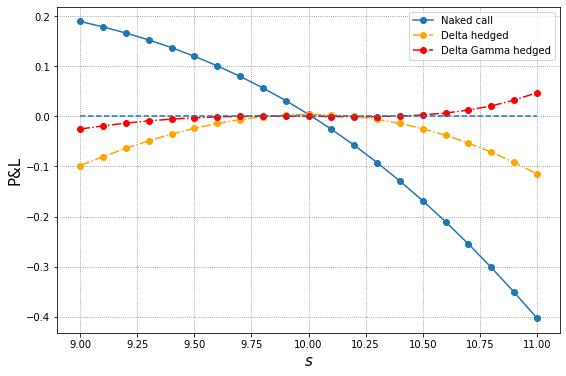

In [18]:
# plot
plt.figure(figsize=(9, 6))
plt.plot(s, pnl_naked, 'o-', label='Naked call')
plt.plot(s, pnl_delta, 'o-.', color='orange', label='Delta hedged')
plt.plot(s, pnl_dg, 'o-.', color='red', label='Delta Gamma hedged')
plt.hlines(y=0, xmin=min(s), xmax=max(s), ls='dashed')
plt.grid(color='grey', ls='dotted')
plt.ylabel('P&L', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.legend();

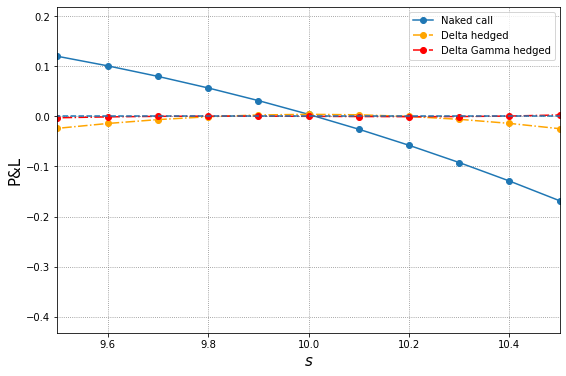

In [19]:
# zoom into the interval [9.5, 10.5]
plt.figure(figsize=(9, 6))
plt.plot(s, pnl_naked, 'o-', label='Naked call')
plt.plot(s, pnl_delta, 'o-.', color='orange', label='Delta hedged')
plt.plot(s, pnl_dg, 'o-.', color='red', label='Delta Gamma hedged')
plt.hlines(y=0, xmin=min(s), xmax=max(s), ls='dashed')
plt.grid(color='grey', ls='dotted')
plt.ylabel('P&L', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.xlim(9.5, 10.5)
plt.legend();

## Dynamical hedging

As market conditions evolve, to maintain the delta neutrality of the portfolio, ideally we should dynamically change the holdings in the porfolio. For example,  

#### Note 
- Rebalancing of hedging portfolio is done after observing the price change. 

### An example on dynamical hedging

In [20]:
# parameters
r, sigma = 0, 0.3
s0, K = 10, 11
dt, t, days_forward = 1/252, 1/4, 30

# portfolio positions in cash, options, underlying
# x : number of shares in underlying
# y : dollars in cash
# z : number of options

# short 1000 calls
z = -1000

# current price and delta of call
c, delta, _ = bs_call(s0, K, sigma, t, r).values()

# construct a zero value and delta neutral portfolio
x = delta*(-z)
y = -(x*s0 + z*c)
port_value, port_delta = x*s0 + y + z*c, x + z*delta
s, pnl_cum = s0, 0

# pandas.DataFrame for presentation
pd.DataFrame(np.array([port_value, port_delta, pnl_cum, s, c, x, y, z*delta]).reshape(1, 8))

,0,1,2,3,4,5,6,7
0,-8.526513e-14,0.0,0.0,10.0,0.250024,287.602907,-2626.00459,-287.602907


In [21]:
# 1 day later
i = 1
s_new = s0*exp((r - sigma**2/2)*dt + sigma*sqrt(dt)*norm.rvs()) # sample a new stock price
c_new, delta_new, _ = bs_call(s_new, K, sigma, t-i*dt, r).values()
#delta_new <- bsCall(s_new, K, sigma, t-i*dt, r)$delta

# portfolio value before rebalance 
port_value_new = x*s_new + y*exp(r*i*dt) + z*c_new
pnl_cum = pnl_cum + port_value_new - port_value

# rebalance to delta neutral
x_new = delta_new*(-z)
y_new = y*exp(r*i*dt) + (x - x_new)*s_new
port_value = x_new*s_new + y_new + z*c_new
port_delta = x_new + z*delta_new
s, c, x, delta, y = s_new, c_new, x_new, delta_new, y_new


# display the result
pd.DataFrame(np.array([port_value, s, c, y, x]).reshape(1, 5))

,0,1,2,3,4
0,-3.047363,9.755789,0.182836,-2083.618507,232.006576


In [22]:
# Let's see how it works for 30 days forward
# initialize data
port_value = np.zeros(days_forward+1)
s = s0 + np.zeros(days_forward+1)
calls = c + np.zeros(days_forward+1)
deltas = delta + np.zeros(days_forward+1)
shares = x + np.zeros(days_forward+1)
cash = y + np.zeros(days_forward+1)

for i in range(days_forward):    
    # sample a stock price
    s[i+1] = s[i]*exp((r - sigma**2/2)*dt + sigma*sqrt(dt)*norm.rvs()) 
    
    # calculate new call price and delta
    calls[i+1], deltas[i+1], _ = bs_call(s[i+1], K, sigma, t-i*dt, r).values()
    
    # portfolio value before rebalance 
    port_value[i+1] = shares[i]*s[i+1] + cash[i]*exp(r*dt) + z*calls[i+1]
    
    # rebalance (self-finacing) to delta neutral
    shares[i+1] = deltas[i+1]*(-z)
    cash[i+1] = cash[i]*exp(r*dt) + (shares[i] - shares[i+1])*s[i+1]
    
# display the result
df = pd.DataFrame(np.array([port_value, s, calls, shares, cash]).T)
df.columns = ['portfolio value', 'stock price', 'call price', 'shares', 'cash']
df

,portfolio value,stock price,call price,shares,cash
0,0.000000,10.000000,0.182836,232.006576,-2083.618507
1,-16.778263,10.052019,0.265294,299.509454,-2762.158702
2,-20.339222,10.315901,0.347890,360.510492,-3391.439362
3,-15.930977,10.277417,0.329608,349.547844,-3278.771660
4,-11.892438,10.352956,0.351974,366.573255,-3455.034979
5,-12.295474,10.154661,0.279688,316.226379,-2943.779526
6,-8.668426,10.079169,0.252188,296.162524,-2741.552528
7,-4.687564,10.032620,0.234421,283.037209,-2609.871237
8,-13.424172,9.704770,0.150364,207.497030,-1876.771165
9,-11.895551,9.577058,0.122335,179.229207,-1606.048584


## Dynamic hedge in practice
- Continuous trading in practice is unrealistic. 
- The tradeoff between frequency of rebalancing and replication of derivative
- Imperfect hedge, risk penalty
- Transaction cost, market order or limit order, etc

## Deep hedging

Research works on hedging problem that resort to reinforcement learning techniques include

- Halperin, *QLBS: Q-Learner in the Black-Scholes(-Merton) Worlds*
- Buehler, Gonon, Teichmann, and Wood, *Deep hedging*
- Cao, Chen, Hull, and Poulos, *Deep hedging of derivatives using reinforcement learning*
- Kolm and Ritter, *Dynamic replication and hedging: a reinforcement learning approach*

## Deep hedging in a nutshell

The key idea behind deep hedging in the aforementioned works is to formulate the hedging problem as a stochastic control problem with certain objective functional, then solve the resulting control problem by the techniques introduced in reinforcement learning.  

Let's take the work by Cao, Chen, Hull, and Poulos as an example. 

## Notations

- $i$: time, running from $0$ to $n$ 
- $C_i$: value of the call/derivative at the beginning of the time $i$
- $S_i$: price of the underlying at the beginning of the time $i$
- $H_i$: holdings of the underlying between time $i$ and $i+1$. 
- $\kappa$: proportional transaction cost
- $R_i$: running reward gained at time $i$

## Settings in Cao-Chen-Hull-Poulos

Cao-Chen-Hull-Poulos formulate the hedging problem as follows.

- a trader is hedging a short position in a call option
- hedging porfolio consisting of shares in the underlying, no cash component?
- the trader rebalances his position at time intervals of length $\Delta t$ and is subject to trading costs 
- The life of the option is $n$. 
- The cost of a trade in the underlying asset is proportional to the value of what is being bought or sold 
- The state at time $i$ is defined by three parameters:
    - 1. The holding $H_{i-1}$ of the asset during the previous time period; i.e., from time $i-1$  to time $i$
    - 2. The asset price $S_i$ at time $i$
    - 3. The time to maturity $(n-i)$
- The action/control $H_i$ at time $i$ is the amount of the asset to be held for the next period, i.e., from time $i$ to time $i+1$.
- Rebalance is done after observing the price change.  

## Two alternative formulations

- There are two alternative formulations for the hedging problem: 
    - the accounting P&L formulation 
    - the cash flow formulation. 
- For ease of exposition, no discounting is assumed in the control problem, i.e., $\gamma=1$

## Accounting P&L formulation

For $1 \leq i \leq n$, define the running reward gained at time $i$ as

\begin{eqnarray*}
R_i &=& -C_i + C_{i-1} + H_{i-1} (S_i - S_{i-1}) - \kappa|S_i(H_i - H_{i-1})| \\
&=& -\Delta C_i + \underbrace{H_{i-1} \Delta S_i}_{\text{marked to market}} - \underbrace{\kappa|S_i\Delta H_i|}_{\text{transaction cost}}.
\end{eqnarray*}

Note that this formulation is consistent with the self-financing conditon with transaction cost that was discussed previously. To set up the hedging initially and liquidate the position at expiry of option, we add to the (undiscounted) cumulative rewards  

- initial reward: $-\kappa|S_0 H_0|$
- terminal reward: $-\kappa|S_n H_n|$

Thus, the performance criterion $Y^A$ for a given hedging strategy $(H_0, \cdots, H_n)$ reads

\begin{eqnarray*}
Y^A &=& -\kappa |S_0 H_0| + \sum_{i=1}^n R_i -\kappa |S_n H_n| \\
&=& -\kappa |S_0 H_0| + C_0 - C_n + \sum_{i=1}^n H_{i-1} \Delta S_i - \kappa\sum_{i=1}^n|S_i\Delta H_i| - \kappa |S_n H_n|.
\end{eqnarray*}


## Cashflow formulation

In this formulation, for $1 \leq i \leq n$, the running reward gained at time $i$ is defined by

$$
R_i = S_i(H_{i-1} - H_i) - \kappa |S_i(H_i - H_{i-1})|
= -S_i \Delta H_i - \kappa |S_i \Delta H_i|
$$

with 
- initial cost for setting up a position: $-S_0H_0 - \kappa|S_0 H_0|$
- terminal cost for liquidate the position and payoff to call: $S_nH_n - \kappa|S_n H_n| - C_n$.

Thus, the performance criterion $Y^C$ for a given hedging strategy $(H_0, \cdots, H_n)$ reads

\begin{eqnarray*}
Y^C &=& -S_0H_0 - \kappa|S_0 H_0| + \sum_{i=1}^n R_i + S_nH_n - \kappa|S_n H_n| - C_n \\
&=& -S_0H_0 - \kappa|S_0 H_0| - \sum_{i=1}^n S_i \Delta H_i - \kappa \sum_{i=1}^n |S_i \Delta H_i| + S_nH_n - \kappa|S_n H_n| - C_n.
\end{eqnarray*}

## Accounting P&L vs cashflow

Recall that 

\begin{eqnarray*}
Y^A &=& -\kappa |S_0 H_0| + C_0 - C_n + \sum_{i=1}^n H_{i-1} \Delta S_i - \kappa\sum_{i=1}^n|S_i\Delta H_i| - \kappa |S_n H_n| \\
&=& -\kappa |S_0 H_0| + C_0 - C_n + H_n S_n - H_0 S_0 - \sum_{i=1}^n S_i \Delta H_i - \kappa\sum_{i=1}^n|S_i\Delta H_i| - \kappa |S_n H_n|
\end{eqnarray*}

where in the last equality we applied the following *summation by parts* formula

\begin{eqnarray*}
\sum_{i=1}^n H_{i-1} \Delta S_i = H_n S_n - H_0 S_0 - \sum_{i=1}^n S_i \Delta H_i. 
\end{eqnarray*}

It follows that 

\begin{eqnarray*}
Y^A - Y^C &=& C_0.
\end{eqnarray*}

The two formulations are basically the same. 


## Objective functional and resulting control problem

Objective functional for the performance criterion $Y$ is given by its expectation penalized by a risk measure. Namely,

$$
\Eof{Y} - \lambda \rho(Y),
$$

where $\rho$ is certain prespecified risk measure. Hence, the hedging problem can be recast as the following stochastic control problem 

$$
\max_{(H_0, \cdots, H_n)} \Eof{Y} - \lambda \rho(Y).
$$

From this point on, reinforcement learning techniques are then applied to solve the above control problem. 

#### Note
- In the original Cao-Chen-Hull-Poulos paper, the authors chose to penalize the expected reward by standard deviation. However, from control theory point of view, penalizing expected reward by variance/standard deviation will induce (unnecessary?) difficulty due to time inconsistency. 
- In the Buehler et al paper, the authors utilized the expected shortfall or conditional value-at-risk as the risk measure. 

## Implementation of Deep hedging in `Tensorflow`

Courtsey: Laura He and Tony Xie, Baruch MFE 2020

## Deep-hedging implementation with DDPG Algorithm

**Step 1**  Initialize neural network of $Q_1(s,a|\theta^{Q_1}), Q_2(s,a|\theta^{Q_2})$ and policy function $\mu(s|\theta^\mu)$. Set target networks $Q_1' \leftarrow Q_1,Q_2' \leftarrow Q_2,\mu' \leftarrow \mu$. Create replay buffer $R$.

**Step 2**  Begin loop:

**for** episode $= 1$ to n_path: 

Generate random process ${N_i}, i = 0, 1, ..., m$ for action exploration. <br>
Get initial state: $s_0 = [S_0$(stock price), $V_0$(option price), $H_{-1} = 0$(holding), $\tau_0 = T = m\, dt$(time to maturity)$]$. 

**for** $i = 0$ to $m$ ($m$ time intervals): 

**Step 2.1** Calculate action: $a_i = (1-\epsilon_i)\mu(s_i|\theta^\mu) + \epsilon_i N_i,\,\, s_i = [S_i, V_i, H_{i-1}, \tau_i = (m-i)dt]$ <br>
**Step 2.2** Execute $a_i$. Get $r_i = -(V_{i+1} - V_i) + H_i(S_{i+1} - S_i) - \kappa |S_ia_i|,\,\, 0\leqslant i<m$ <br>
$\hspace{4.2 cm} r_m = - \kappa|S_mH_{m-1}|$ <br>
**Step 2.3** Observe new state: $s_{i+1} = [S_{i+1}, V_{i+1}, H_i = H_{i-1}+a_i, \tau_{i+1} = (m-i-1)dt]$ <br>
**Step 2.4** Store $(s_i, a_i, r_i, s_{i+1})$ in the replay buffer $R$. <br>
**Step 2.5** Sample $J$ transitions from $R$, mark as $(s_j, a_j, r_j, s_{j+1}), \,\, j = 1 \sim N/ J?$ <br>
$\hspace{1.6 cm}y_j^{(1)} = r_j + \gamma Q_1'(s_{i+1}, \mu'(s_{i+1}|\theta^{\mu'})|\theta^{Q'})$ 

$\hspace{1.6 cm}y_j^{(2)} = r_j^2 + \gamma^2 Q_2'(s_{i+1}, \mu'(s_{i+1}|\theta^{\mu'})|\theta^{Q'}) + 2 \gamma r_j Q_1'(s_{i+1}, \mu'(s_{i+1}|\theta^{\mu'})|\theta^{Q'}) $ 

$\hspace{1.4 cm}$ Update $Q_{1,2}$: $Q_{1,2} = \underset{Q_{1,2}}{\mathrm{argmin}}\left\{\frac{1}{J}\sum_j\left(y_j^{(1,2)} - Q_{1,2}(s_j,a_j|\theta^{Q_{1,2}})\right)^2\right\}$ <br>
$\hspace{1.4 cm}$ Update $\mu$ using gradient descent: $\nabla_{\theta^{\mu}}G = \frac{1}{J}\sum_j\nabla_aF(s_j, a_j|\theta^{Q_{1,2}})\nabla_{\theta^{\mu}}\mu(s_j|\theta^{\mu}),\,\, \theta^\mu = \theta^\mu - \nabla_{\theta^\mu}G \times \text{step}$

**Step 2.6** Update the target networks: $\theta^{Q'_{1,2}} \leftarrow \tau\theta^{Q_{1,2}} + (1-\tau)\theta^{Q'_{1,2}}, \,\,\theta^{\mu'} \leftarrow \tau\theta^\mu + (1-\tau)\theta^{\mu'}$

In [2]:
# import DDPG and other related packages

import numpy as np
from DDPG.world import World
import tensorflow as tf
from DDPG.blackscholesgenerator import GenerateBSPath, BSCall
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Performance of deep hedging vs delta hedging

In [24]:
# python function to implement the trained model 
def DDPG(n_path=5000, m=4, T=1/12, r=0, q=0, sigma=0.2, S0=100, K=100, model_path=""):
    stock_price, call_price, call_delta = GenerateBSPath(n_path=n_path, \
                m=m, T=T, r=r, q=q, sigma=sigma, S0=S0, K=K)
        
    V0 = call_price[0,0]
    initial_state = np.array([S0, V0, 0, T])
    state_size, action_size = 4, 1

    world = World(state_size, action_size, initial_state, dt=T/m)
    # load-in saved (trained) model 
    actor_model = tf.keras.models.load_model(f'{model_path}/Actor_Model', compile=False)

    actions_model = np.zeros((n_path, m))
    rewards = np.zeros(n_path)

    for episode in range(n_path):

        if episode % 2000 == 0:
            print(episode)

        world.initialize()

        for i in range(m):
            state = world.get_state()
            actions_model[episode, i] = actor_model(np.array([state]))[0,0]
            next_state, reward, done = world.act(actions_model[episode, i], (stock_price[episode, i+1], call_price[episode, i+1]))
            rewards[episode] += reward 

        state = world.get_state()
        rewards[episode] += world.act(0, (0,0))[1]

#    print(actions_model)
    
    positions = call_delta[:,:m]
    actions = np.hstack((call_delta[:,0].reshape(n_path,1), np.diff(call_delta[:,:m], axis = 1)))
    payoff = positions*np.diff(stock_price, axis=1) - np.diff(call_price, axis=1) - np.abs(actions*stock_price[:,:m])*0.01 
    payoff = np.sum(payoff, axis=1)
    payoff -= np.abs(call_delta[:,m]*stock_price[:,m])*0.01
        
    payoff_zero = - np.diff(call_price, axis = 1) 
    payoff_zero = np.sum(payoff_zero, axis = 1)
    
    hedging_cost_mean = np.array([-rewards.mean(), -payoff.mean(), -payoff_zero.mean()])
    hedging_cost_std = np.array([rewards.std(), payoff.std(), payoff_zero.std()])
    obj_func = hedging_cost_mean + 1.5*hedging_cost_std
    
    method_name = ["DDPG", "Delta", "No Hedge"]
    hedging_cost_mean = np.array([-rewards.mean(), -payoff.mean(), -payoff_zero.mean()])
    hedging_cost_std = np.array([rewards.std(), payoff.std(), payoff_zero.std()])
    obj_func = hedging_cost_mean + 1.5*hedging_cost_std
    
    mean_in_price = 100 * hedging_cost_mean / V0
    std_in_price = 100 * hedging_cost_std / V0
    obj_func_in_price = mean_in_price + 1.5*std_in_price
    
    result = pd.DataFrame({'Name': method_name,
                           'Mean': hedging_cost_mean,
                           'STD': hedging_cost_std, 
                           'Obj Func': obj_func, #\
                           'Mean in Option Price(%)': mean_in_price, 
                           'STD in Option Price(%)': std_in_price, #\
                           'Obj Func in Option Price(%)': obj_func_in_price})
    
    print(f"----------- DDPG Result: {m} hedges in {int(T*12)} month. -----------")
        
    print(result)
    
    plt.figure(figsize=(8,6))
    sns.histplot(rewards, label='DDPG', kde=True, stat='density', element='step')
    sns.histplot(payoff, kde=True, label='Delta', stat='density', color='orange', element='step')
    plt.legend()
    plt.show();
    
    return actor_model

In [25]:
# function for plotting optimal policy 
from mpl_toolkits.mplot3d import Axes3D

def plotAction(curr_model):
    
    TT = np.arange(0, 1, 0.05)
    SS = np.arange(80, 120, 0.5)
    Y, X = np.meshgrid(TT, SS)
    Z_DDPG = np.zeros((SS.shape[0], TT.shape[0]))
    #Z_BS = np.zeros((SS.shape[0], TT.shape[0]))

    for i in range(SS.shape[0]):
        for j in range(TT.shape[0]):
            BS_model = BSCall(T=TT[j], sigma=sigma, S0=SS[i])
            Z_DDPG[i,j] = curr_model(np.array([[SS[i],BS_model[0],0,TT[j]]])).numpy()[0][0]
            #Z_BS[i,j] = BS_model[1]
        
    V0 = BSCall(T=T, sigma=sigma, S0=S0)[0]
    BS_action_pos = [curr_model(np.array([[S0, V0, _pos, T]])).numpy()[0][0] for _pos in np.arange(-1,1,0.05)]
    
    # %matplotlib notebook
    fig = plt.figure(figsize=(16,6))  
    ax3 = fig.add_subplot(1, 2, 1, projection='3d')
    ax3.plot_surface(X, Y, Z_DDPG)
    # ax3.plot_surface(X,Y,Z_BS)
    plt.title("Action vs. Stock price & Time to maturity")
    plt.xlabel("Stock price")
    plt.ylabel("Time to maturity")
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(np.arange(-1, 1, 0.05), BS_action_pos)
    plt.title("Action vs. Position")
    plt.xlabel("Position")
    plt.show();

## One-month option, weekly hedging

0
2000
4000
----------- DDPG Result: 4 hedges in 1 month. -----------
       Name      Mean       STD  Obj Func  Mean in Option Price(%)  \
0      DDPG  1.135190  2.199476  4.434405                49.292360   
1     Delta  1.543443  1.172043  3.301507                67.019524   
2  No Hedge  0.053613  3.528923  5.346998                 2.327991   

   STD in Option Price(%)  Obj Func in Option Price(%)  
0               95.505895                   192.551203  
1               50.892563                   143.358369  
2              153.233282                   232.177914  


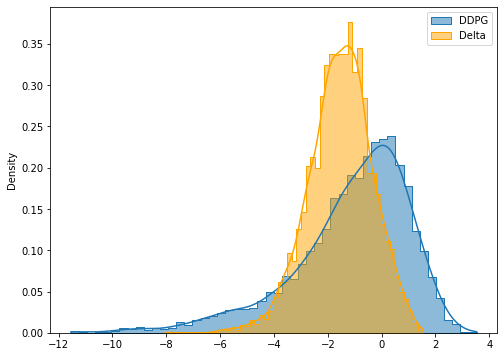

CPU times: user 39.6 s, sys: 474 ms, total: 40.1 s
Wall time: 44.2 s


In [26]:
%%time
# model paramters
r, q, sigma, S0, K = 0, 0, 0.2, 100, 100

# simulation parameters
# option expires in a month, hedging weekly
T, m, n_path = 1/12, 4, 5_000

model_path = "DDPG/trained_models/1m/weekly"

# set random seed for reproducing the result
np.random.seed(9999)

weekly = DDPG(n_path=n_path, m=m, T=T, r=r, q=q, sigma=sigma, S0=S0, K=K, model_path=model_path)

## What does the optimal action look like?

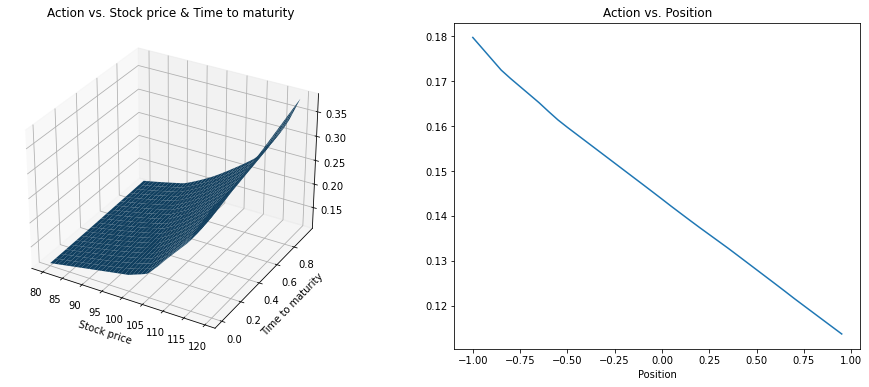

In [27]:
plotAction(weekly)

## One-month option, tridaily hedging

0
2000
4000
----------- DDPG Result: 10 hedges in 1 month. -----------
       Name      Mean       STD  Obj Func  Mean in Option Price(%)  \
0      DDPG  1.798405  2.092016  4.936429                78.090543   
1     Delta  1.957786  0.940487  3.368517                85.011175   
2  No Hedge  0.017840  3.497339  5.263849                 0.774652   

   STD in Option Price(%)  Obj Func in Option Price(%)  
0               90.839720                   214.350123  
1               40.837944                   146.268091  
2              151.861840                   228.567411  


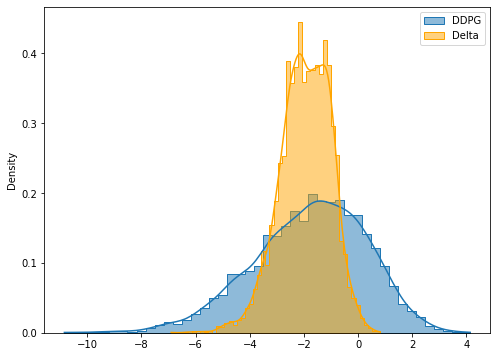

CPU times: user 1min 22s, sys: 470 ms, total: 1min 23s
Wall time: 1min 26s


In [28]:
%%time
# one month option, tridaily hedging
T, m = 1/12, 10
model_path = "DDPG/trained_models/1m/3-day"
tridaily = DDPG(n_path=n_path, m=m, T=T, r=r, q=q, sigma=sigma, S0=S0, K=K, model_path=model_path)

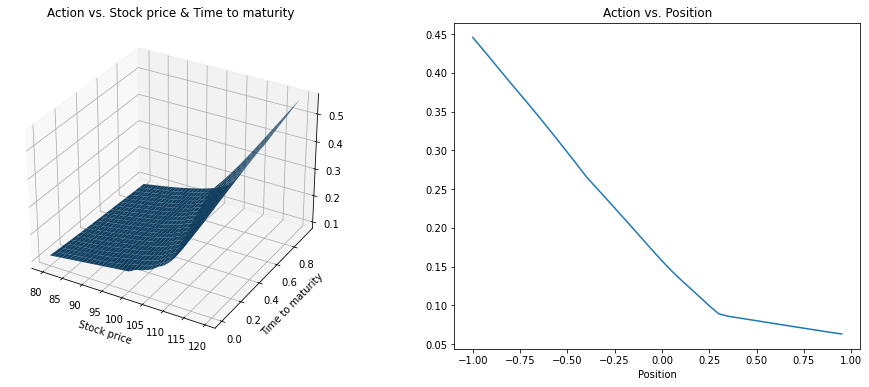

In [29]:
# plot tridaily action function 
plotAction(tridaily)

## 3-month option, weekly hedging

0
2000
4000
----------- DDPG Result: 4 hedges in 3 month. -----------
       Name      Mean       STD  Obj Func  Mean in Option Price(%)  \
0      DDPG  0.857972  3.904092  6.714110                21.515140   
1     Delta  1.474011  1.784586  4.150890                36.963365   
2  No Hedge -0.124989  6.013195  8.894803                -3.134323   

   STD in Option Price(%)  Obj Func in Option Price(%)  
0               97.901839                   168.367898  
1               44.751576                   104.090729  
2              150.791253                   223.052557  


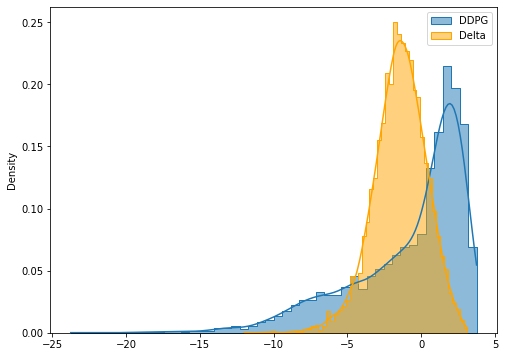

CPU times: user 34.3 s, sys: 250 ms, total: 34.5 s
Wall time: 36.1 s


In [30]:
%%time
# 3 months option, weekly hedging
T, m = 3/12, 4
model_path = "DDPG/trained_models/3m/weekly"
weekly_3m = DDPG(n_path=n_path, m=m, T=T, r=r, q=q, sigma=sigma, S0=S0, K=K, model_path=model_path)

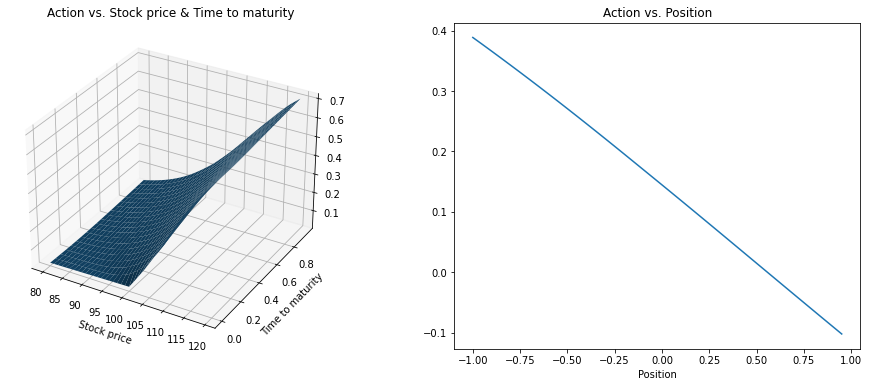

In [31]:
plotAction(weekly_3m)

## Concluding remarks on deep hedging

- Hedging with DDPG Algorithm can reduce the average hedging cost, however, it increases the variance of cost for the Black-Scholes model and probably also for stochastic volatility models.

- As is mentioned in the original paper, the impact of trading costs (or transaction cost) is to under-hedge relative to delta hedging in some situations and over-hedge in other situations. By hedging short European call option position, we observe under-hedge relative to delta hedging.

- One may be able to reduce the variance of hedging cost in the DDPG Algorithm by adding more paths for training. In the code, we used 5000 training paths for each model while renewing the model after each episode. However, using too many paths in the training stage may result in overfitting.